### Lab | Predicting Claim Amount with ML Linear Regression
#### Introduction

For this lab, we still keep using the marketing_customer_analysis.csv file - the US car insurance data set. You should be able to pick up where you left off in the previous rounds of customer behaviour analysis. However this time we will look to apply a linear regression machine learning model

Review the previous rounds and follow the steps as shown in previous lectures.

1. Problem (case study)
   
    Familiarise yourself with Data Descriptions and the Goal.


2. Getting Data
   
    Read the .csv file into python


3. Cleaning/Wrangling/EDA
   
    Change headers names. Deal with NaN values, replace with appropriate method.

    split categorical Features and Numerical Features.

    Explore visually both sets of features, to identify next steps.

    Look at potential multicollinearity using a correlation matrix or other approach.


4. Pre-Processing Data
    
    Dealing with outliers. Normalization - ie use chosen scaler to transform selected columns into normal distribution as needed for linear regression model. Propose: MinMax scaler on 'effective_to_date' and standard scaler on numerical columns.

    Encoding Categorical Data fields using OHE.

    Bring categorical and numerical columns back together using pd.concat.

    Define X and y, the y value you are seeking to predict is claim amount.

    Splitting into train set and test dataset using random state, eg 80%:20% .


5. Modeling
    
    Apply linear regression model from sklearn.linear_model.

    Fit over your train data and predict against X test.


6. Model Validation
    
    You should gather appropriate metrics to evaluate model accuracy over y_test- such as : R2. MSE. RMSE. MAE.


7. Reporting
    
    Present results inside your notebook with appropriate annotation describing the accuracy of the model and business insight gained.

#### data definitions for handy reference :
Unnamed: Index customer: Customer ID state: US State customer_lifetime_value: CLV is the client economic value for a company during all their relationship response: Response to marketing calls (customer engagement) coverage: Customer coverage type education: Customer education level effective_to_date: Effective to date employmentstatus: Customer employment status gender: Customer gender income: Customer income location_code: Customer living zone marital_status: Customer marital status monthly_premium_auto: Monthly premium months_since_last_claim: Last customer claim months_since_policy_inception: Policy Inception number_of_open_complaints: Open claims number_of_policies: Number policies policy_type: Policy type policy: Policy renew_offer_type: Renew sales_channel: Sales channel (customer-company first contact) total_claim_amount: Claims amount vehicle_class: Vehicle class vehicle_size: Vehicle size vehicle_type: Vehicle type

In [1]:
import numpy as np
import pandas as pd
import datetime
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

### 2. Getting Data

In [3]:
df = pd.read_csv("marketing_customer_analysis.csv")
pd.set_option('display.max_columns', None)

### Cleaning/Wrangling/EDA

In [4]:
# Change headers names
df.columns=[column.lower().replace(' ', '_') for column in df.columns]

df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       9134 non-null   object 
 1   state                          9134 non-null   object 
 2   customer_lifetime_value        9134 non-null   float64
 3   response                       9134 non-null   object 
 4   coverage                       9134 non-null   object 
 5   education                      9134 non-null   object 
 6   effective_to_date              9134 non-null   object 
 7   employmentstatus               9134 non-null   object 
 8   gender                         9134 non-null   object 
 9   income                         9134 non-null   int64  
 10  location_code                  9134 non-null   object 
 11  marital_status                 9134 non-null   object 
 12  monthly_premium_auto           9134 non-null   i

In [6]:
df.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [9]:
# the unique customer ID doesn't provide relevant info for our prediction
df=df.drop(columns=['customer'])

In [10]:
df=df.dropna()   # drop rows with nan values

In [11]:
for c in df.columns.tolist():         # know the number of unique values for each column
    print(c, len(df[c].unique()))

state 5
customer_lifetime_value 8041
response 2
coverage 3
education 5
effective_to_date 59
employmentstatus 5
gender 2
income 5694
location_code 3
marital_status 3
monthly_premium_auto 202
months_since_last_claim 36
months_since_policy_inception 100
number_of_open_complaints 6
number_of_policies 9
policy_type 3
policy 9
renew_offer_type 4
sales_channel 4
total_claim_amount 5106
vehicle_class 6
vehicle_size 3


### Categorical features

In [13]:
df['effective_to_date'].dtype

dtype('O')

In [14]:
# convert it to datetime
df['effective_to_date']=pd.to_datetime(df['effective_to_date'])

In [15]:
# check datatype again
df['effective_to_date'].dtype

dtype('<M8[ns]')

In [16]:
# check when data begin
df['effective_to_date'].min()


Timestamp('2011-01-01 00:00:00')

In [17]:
# check when data end
df['effective_to_date'].max()

Timestamp('2011-02-28 00:00:00')

In [18]:
# we will change the effective to date column to ordinal
df['effective_to_date']=df['effective_to_date'].apply(lambda x: x.toordinal())

In [19]:
df['effective_to_date']

0       734192
1       734168
2       734187
3       734157
4       734171
         ...  
9129    734178
9130    734180
9131    734174
9132    734171
9133    734182
Name: effective_to_date, Length: 9134, dtype: int64

### Values for each class in categorical features

In [24]:
# single out categorical columns
cat_cols=[col for col in df.columns if (df[col].dtype==object)]     # categorical columns

In [25]:
# writing some code to have a nicer output over all categorical features

print('Categorical Features:', len(cat_cols))
print('----------')
for c in cat_cols:
    print('Name: {}'.format(df[c].name))    # column name
    print('Type: {}'.format(df[c].dtype))   # column type
    print('Unique values: {}'.format(len(df[c].unique())))   # column unique values
    print(df[c].unique())
    print(((df[c].value_counts()/ sum(df[c].value_counts()))*100))   # percentage
    print('\n----------')


Categorical Features: 14
----------
Name: state
Type: object
Unique values: 5
['Washington' 'Arizona' 'Nevada' 'California' 'Oregon']
California    34.486534
Oregon        28.476024
Arizona       18.644624
Nevada         9.656229
Washington     8.736589
Name: state, dtype: float64

----------
Name: response
Type: object
Unique values: 2
['No' 'Yes']
No     85.679877
Yes    14.320123
Name: response, dtype: float64

----------
Name: coverage
Type: object
Unique values: 3
['Basic' 'Extended' 'Premium']
Basic       60.959054
Extended    30.019707
Premium      9.021239
Name: coverage, dtype: float64

----------
Name: education
Type: object
Unique values: 5
['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']
Bachelor                30.085395
College                 29.351872
High School or Below    28.705934
Master                   8.112547
Doctor                   3.744252
Name: education, dtype: float64

----------
Name: employmentstatus
Type: object
Unique values: 5
['Employe

In [26]:
df.describe()     # stats

,customer_lifetime_value,effective_to_date,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,734166.837749,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,16.942769,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,734138.000000,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,734152.000000,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,734166.000000,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,734181.000000,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,734196.000000,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [27]:
# Singleing out numerical columns
num_cols=[c for c in df.columns if (df[c].dtype!='object') and (c!='effective_to_date')]   # numerical columns

In [28]:
num_cols

['customer_lifetime_value',
 'income',
 'monthly_premium_auto',
 'months_since_last_claim',
 'months_since_policy_inception',
 'number_of_open_complaints',
 'number_of_policies',
 'total_claim_amount']

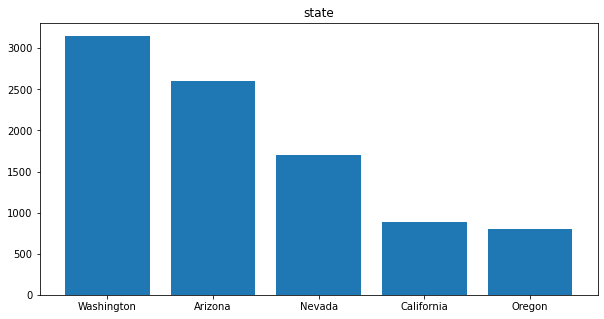

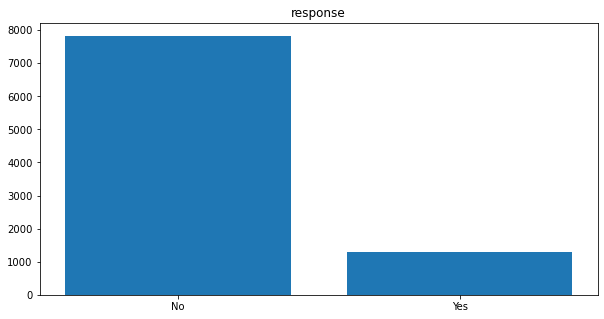

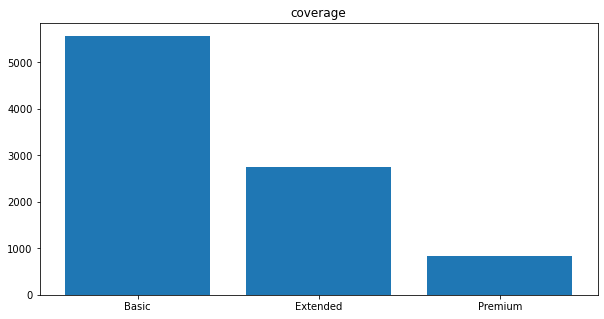

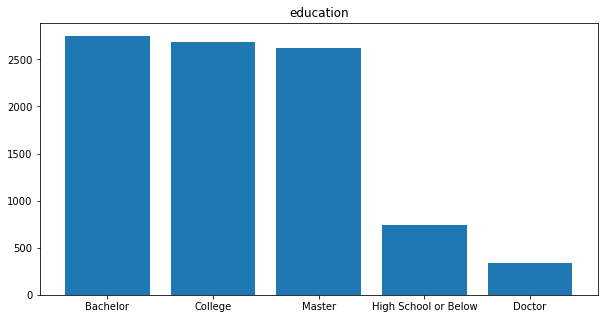

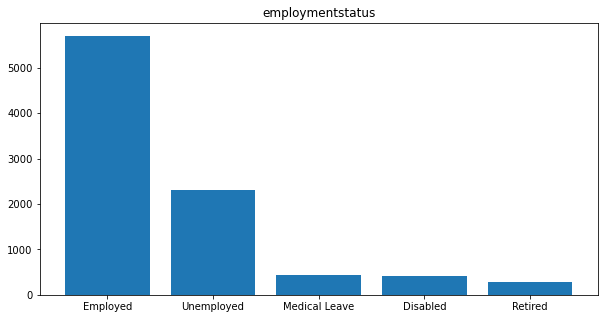

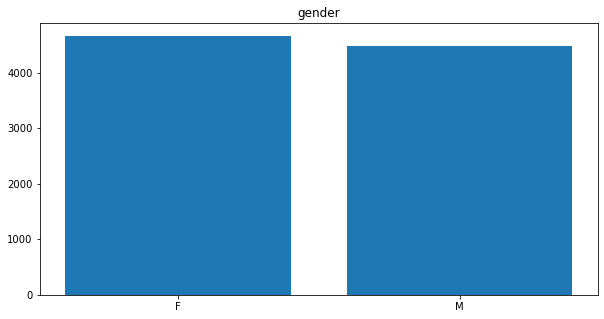

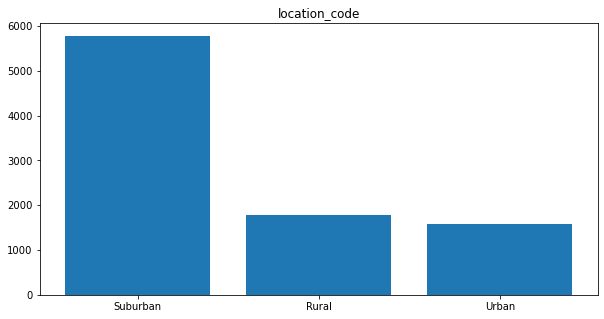

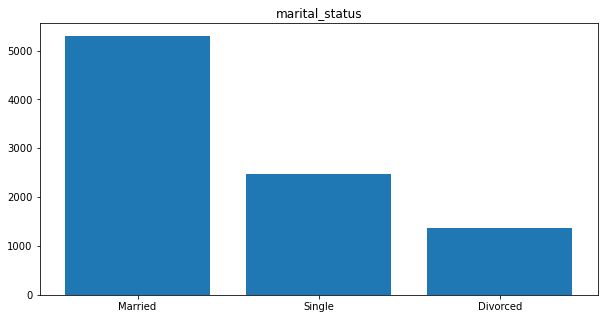

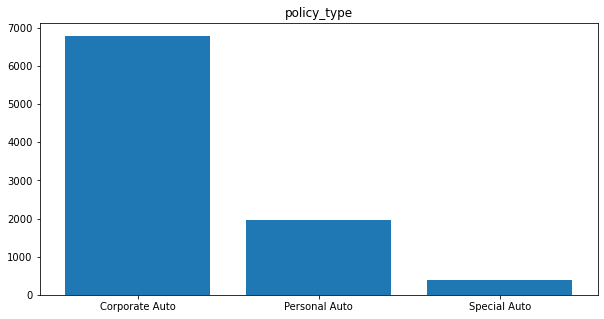

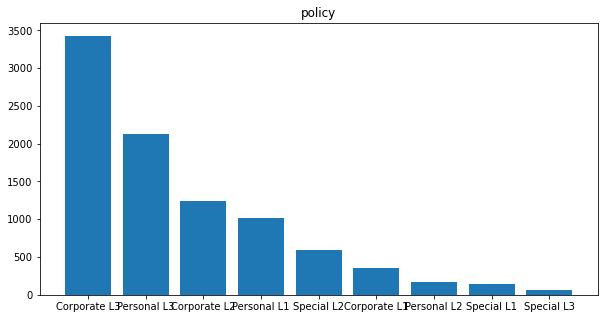

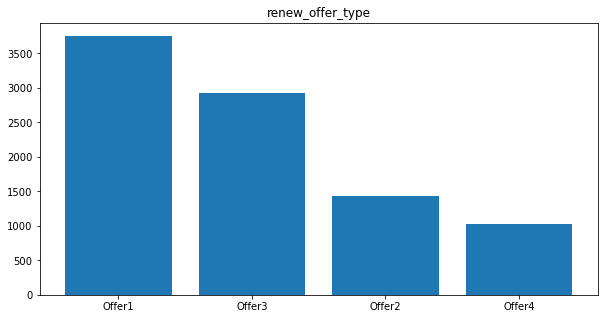

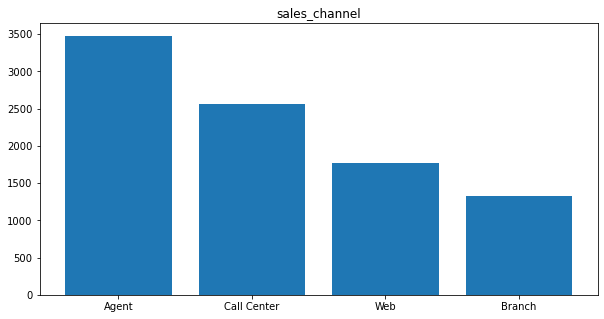

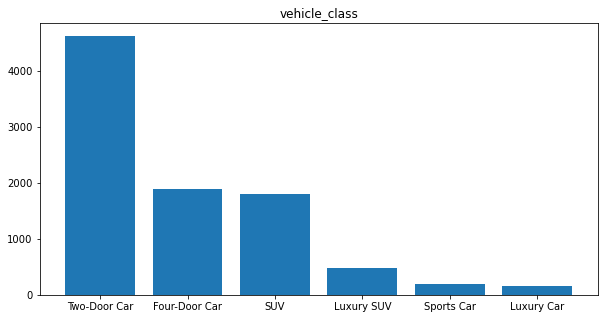

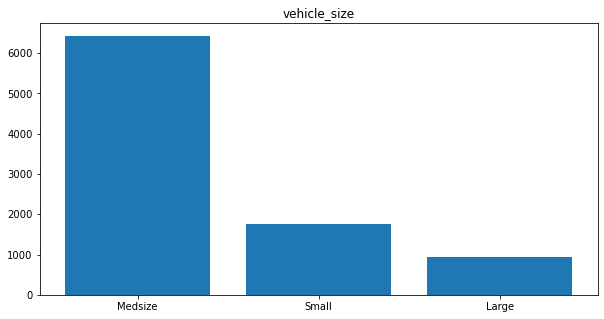

In [29]:

import matplotlib.pyplot as plt

# These plots don't have to be nice (you wouldn't present them),
# they're just to get an overview
for c in cat_cols:
    plt.figure(figsize=(10,5))
    plt.bar(df[c].unique(), df[c].value_counts())
    plt.title(c)
    plt.show();

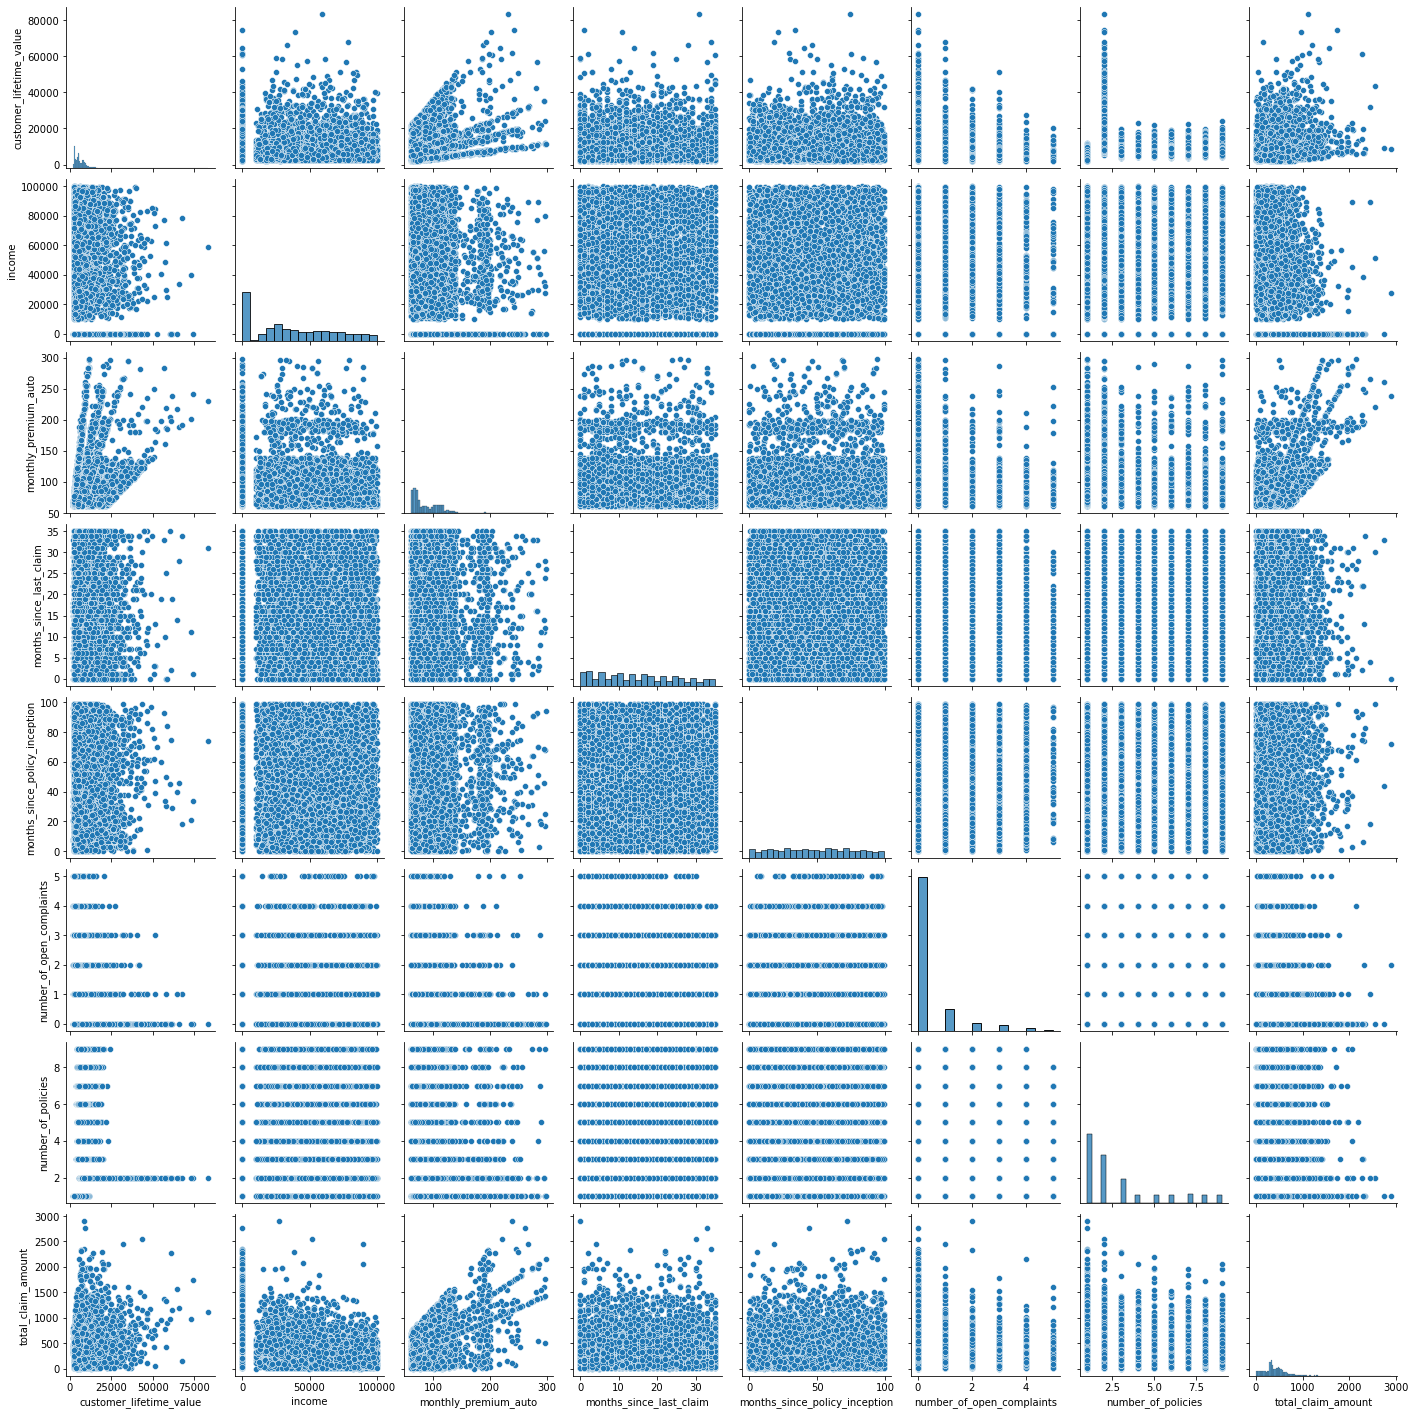

In [12]:
# Looking at potential multicollinearity using a correlation matrix or other approach
sns.pairplot(df)

<AxesSubplot:>

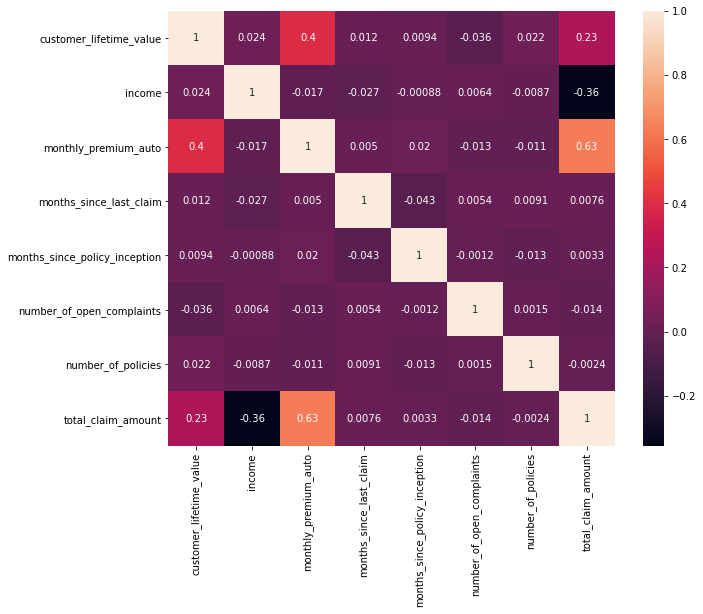

In [13]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(df.corr(),annot=True,ax=ax)

###  Pre-Processing Data

In [30]:
# e.g. 3*IQR in a column

q1=np.percentile(df['customer_lifetime_value'], 25)   # percentile 25
q3=np.percentile(df['customer_lifetime_value'], 75)   # percentile 75

iqr=q3-q1  # IQR

upper=q3+3*iqr   # upper boundary
lower=q1-3*iqr   # lower boundary

In [28]:
# Dealing with outliers
#iqr = np.percentile(df['customer_lifetime_value'],75) - np.percentile(df['customer_lifetime_value'],25)
#upper_limit = np.percentile(df['customer_lifetime_value'],75) + 1.5*iqr
#lower_limit = np.percentile(df['customer_lifetime_value'],25) - 1.5*iqr

In [29]:
# Normalization
#df = df[(df['customer_lifetime_value']>lower_limit) & (df['customer_lifetime_value']<upper_limit)]

In [32]:
# how many rows would be outliers in that sense (below the threshold)?

len(df[df['customer_lifetime_value'] < lower])

0

In [33]:

# how many rows would be outliers in that sense (above the threshold)?
len(df[df['customer_lifetime_value'] > upper])

367

<AxesSubplot:>

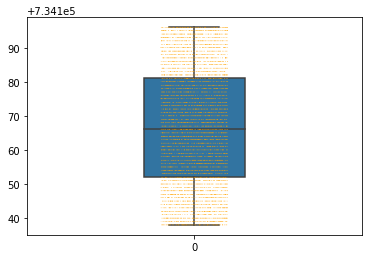

In [34]:
# min-max-scaler
# plot before scaling:
fig, ax = plt.subplots()
sns.boxplot(data=df['effective_to_date'], width=.3)
sns.stripplot(data=df['effective_to_date'], color="orange", jitter=0.1, size=.5, ax=ax)

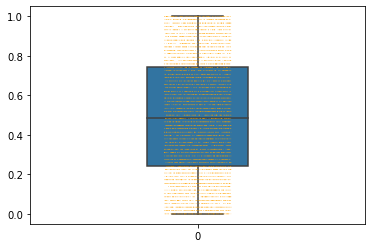

In [35]:
from sklearn.preprocessing import MinMaxScaler

df['effective_to_date']=MinMaxScaler().fit_transform(df['effective_to_date'].values.reshape(-1, 1))

# plot after scaling
fig, ax = plt.subplots()
sns.boxplot(data=df['effective_to_date'], width=.3)
sns.stripplot(data=df['effective_to_date'], color="orange", jitter=0.1, size=.5, ax=ax);

In [37]:
df['effective_to_date'].head()

0    0.931034
1    0.517241
2    0.844828
3    0.327586
4    0.568966
Name: effective_to_date, dtype: float64

#### standardize

In [38]:
from sklearn.preprocessing import StandardScaler
num_cols

['customer_lifetime_value',
 'income',
 'monthly_premium_auto',
 'months_since_last_claim',
 'months_since_policy_inception',
 'number_of_open_complaints',
 'number_of_policies',
 'total_claim_amount']

In [40]:
for c in num_cols[:-1]:   # we'll normalize all except the target column
    df[c]=StandardScaler().fit_transform(df[c].values.reshape(-1, 1))

In [41]:
df.head()

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,Washington,-0.762878,No,Basic,Bachelor,0.931034,Employed,F,0.612827,Suburban,Married,-0.703925,1.678099,-1.543287,-0.42225,-0.822648,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,Arizona,-0.149245,No,Extended,Bachelor,0.517241,Unemployed,F,-1.239617,Suburban,Single,0.022691,-0.208186,-0.217334,-0.42225,2.106160,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,Nevada,0.710636,No,Premium,Bachelor,0.844828,Employed,F,0.365710,Suburban,Married,0.429596,0.288205,-0.360680,-0.42225,-0.404247,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,California,-0.052263,No,Basic,Bachelor,0.327586,Unemployed,M,-1.239617,Suburban,Married,0.371467,0.288205,0.606907,-0.42225,1.687759,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,Washington,-0.755575,No,Basic,Bachelor,0.568966,Employed,M,0.203390,Rural,Single,-0.587666,-0.307465,-0.145661,-0.42225,-0.822648,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


#### Encoding Categorical Data

In [43]:
one_hot_data=pd.get_dummies(df[cat_cols], drop_first=True)   # one hot encoding categorical variables

one_hot_data.head()

,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,coverage_Extended,coverage_Premium,education_College,education_Doctor,education_High School or Below,education_Master,employmentstatus_Employed,employmentstatus_Medical Leave,employmentstatus_Retired,employmentstatus_Unemployed,gender_M,location_code_Suburban,location_code_Urban,marital_status_Married,marital_status_Single,policy_type_Personal Auto,policy_type_Special Auto,policy_Corporate L2,policy_Corporate L3,policy_Personal L1,policy_Personal L2,policy_Personal L3,policy_Special L1,policy_Special L2,policy_Special L3,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small
0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
4,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


#### Concat numerical and categorical DataFrames

In [45]:
df=pd.concat([df, one_hot_data], axis=1)   # concat dataframes
df.drop(columns=cat_cols, inplace=True)
df.head()

,customer_lifetime_value,effective_to_date,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,coverage_Extended,coverage_Premium,education_College,education_Doctor,education_High School or Below,education_Master,employmentstatus_Employed,employmentstatus_Medical Leave,employmentstatus_Retired,employmentstatus_Unemployed,gender_M,location_code_Suburban,location_code_Urban,marital_status_Married,marital_status_Single,policy_type_Personal Auto,policy_type_Special Auto,policy_Corporate L2,policy_Corporate L3,policy_Personal L1,policy_Personal L2,policy_Personal L3,policy_Special L1,policy_Special L2,policy_Special L3,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small
0,-0.762878,0.931034,0.612827,-0.703925,1.678099,-1.543287,-0.42225,-0.822648,384.811147,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,-0.149245,0.517241,-1.239617,0.022691,-0.208186,-0.217334,-0.42225,2.106160,1131.464935,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,0.710636,0.844828,0.365710,0.429596,0.288205,-0.360680,-0.42225,-0.404247,566.472247,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
3,-0.052263,0.327586,-1.239617,0.371467,0.288205,0.606907,-0.42225,1.687759,529.881344,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
4,-0.755575,0.568966,0.203390,-0.587666,-0.307465,-0.145661,-0.42225,-0.822648,138.130879,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


#### Splitting into train set and test set

In [46]:
# first, split X-y (learning-target data)
X = df.drop(columns=['total_claim_amount'])
y = df['total_claim_amount']

In [47]:
# checking shape
print(X.shape)
print(y.shape)

(9134, 51)
(9134,)


In [48]:
# train_test_split
from sklearn.model_selection import train_test_split as tts

# train-test-split (4 sets)
X_train, X_test, y_train, y_test=tts(X, y, test_size=0.2, random_state=42)  # random state fixed sample

### 5 Modelling

#### We have now the data prepared for the regression problem.

#### Linear Regression

In [49]:
from sklearn.linear_model import LinearRegression as LinReg

# create an (untrained) model "instance"
linreg=LinReg()    

# train the model
linreg.fit(X_train, y_train)

# predict target data from test features , that the model has never seen
y_pred_linreg=linreg.predict(X_test)

### 6 - Model Validation¶

In [50]:
models=[linreg,
        # add more models here
       ]
model_names=['linreg',
             # add more model strings here
            ]
preds=[y_pred_linreg,
       # add more predicted labels here
      ]

#### R2

In [51]:
# this for loop is actually not necessary when only 1 model is used.
for i in range(len(models)):

    train_score=models[i].score(X_train, y_train) #R2
    test_score=models[i].score(X_test, y_test)

    print ('Model: {}, train R2: {} -- test R2: {}'.format(model_names[i], train_score, test_score))

Model: linreg, train R2: 0.7743071533051843 -- test R2: 0.7626410023961919


### Mean Squared Error (MSE)

In [57]:
from sklearn.metrics import mean_squared_error as mse

for i in range(len(models)):

    train_mse=mse(models[i].predict(X_train), y_train) #MSE
    test_mse=mse(preds[i], y_test)

    print ('Model: {}, train MSE: {} -- test MSE: {}'.format(model_names[i], train_mse, test_mse))

Model: linreg, train MSE: 19308.39422399765 -- test MSE: 18872.66093525729


### Root Mean Squared Error (RMSE)

In [54]:
for i in range(len(models)):

    train_rmse=mse(models[i].predict(X_train), y_train)**0.5 #RMSE
    test_rmse=mse(preds[i], y_test)**0.5

    print ('Model: {}, train RMSE: {} -- test RMSE: {}'.format(model_names[i], train_rmse, test_rmse))

Model: linreg, train RMSE: 138.95464808345798 -- test RMSE: 137.37780364839617


### Mean Average Error (MAE)

In [59]:
from sklearn.metrics import mean_absolute_error as mae
for i in range(len(models)):
    train_mae=mae(models[i].predict(X_train), y_train) #MAE
    test_mae=mae(preds[i], y_test)

    print ('Model: {}, train MAE: {} -- test MAE: {}'.format(model_names[i], train_mae, test_mae))

Model: linreg, train MAE: 95.20813765725703 -- test MAE: 94.54575948996765
